In [8]:
from IPython.display import YouTubeVideo

# Herramienta de anotación

## Motivo

El desarrollo de una herramienta específica de anotación es necesaria debido a que a diferencia de la segmentación de órganos de riesgo y/o tumores que hacemos para entrenar una red neuronal que identifica estructuras anatómicas, en este caso lo que queremos identificar sobre la imagen es un objeto del que tenemos información constructiva detallada. Dentro de el conjunto de herramientas del planificador de tratamiento (TPS), existe una que nos permite posicionar los aplicadores, llamadas bibliotecas de aplicadores (library applicator), pero al ser un software propietario extraer información para su posterior uso es complicado. Por esta y otra serie de limitaciones, nos decidimos a diseñar una nueva, más a medida de nuestras necesidades. 

## Reconstrucción en Braquiterapia

Denominaremos reconstrucción en braquiterapia al proceso mediante el cual identificamos sobre una imágen o en nuestro caso una secuencia de imágenes el camino que seguirá la fuente radiactiva durante el implante. 

### Tipos de reconstrucción

El proceso de reconstrucción del aplicador puede realizarse mediante diferentes métodos, según se describe en {cite}`hellebustRecommendationsGynaecologicalGYN2010`: Planes de Biblioteca (LIB), reconstrucción directa (DR) o una combinación de ambos (Hybrid).
- **Reconstrucción directa** (DR) Consiste en la determinación de las trayectorias que seguirá la fuente a través de la identificación de una secuencia de puntos directamente sobre la reconstrucción de las imágenes adquiridas. Para ello, estas trayectorias deben estar lo suficientemente definidas en la imagen como para que podamos tomar la cantidad de puntos suficiente para que sean determinadas con precisión. Además, es muy importante localizar la posición de parada de la fuente más distal, ya que con esta posición y con el sentido de desplazamiento de la fuente establecido por el orden de elección de los puntos, será como el sistema que posiciona la fuente conozca la longitud de hilo que debe sacar en cada momento.
-**Planes de Biblioteca**(LIB) A partir de un conjunto de ficheros que contienen los datos de construcción de los aplicadores (lo que conocemos como una **biblioteca de aplicadores**) tomamos el modelo que hemos implantado en la paciente y lo superponemos sobre la imagen adquirida de la paciente con él implantado. En principio ya no es necesario ver los canales por donde circula la fuente y mucho menos conocer la primera posición de parada. Con conocer la transformación afín que relaciona el sistema de referencia de la biblioteca con el de la imagen adquirida sería suficiente para tener definidos los caminos por donde circulará la fuente. En principio, solo podríamos utilizar este sistema en aquellos aplicadores que son rígidos.
- **Planes Híbridos** (Hybrid) También existe la posibilidad de hacer una reconstrucción mixta: Parte en reconstrucción directa, parte con la ayuda de bibliotecas.

Es este último tipo el que utilizaremos en nuestro caso para la reconstrucción y por tanto para el proceso de anotado de las imágenes.

### Sistema de planificación (TPS)

EL sistema de planificación que utilizamos es Oncentra Brachy que pertenece a la compañía Elekta. El software integra diversos módulos que permiten la planificación del tratamiento desde la adquisición de las imágenes del paciente, hasta la exportación del fichero con la información sobre posiciones que la fuente radiactiva deberá recorrer a lo largo de los canales y el tiempo que deberá permanecer en cada una de las paradas para depositar la dosis necesaria. La reconstrucción de los aplicadores se hace a través de dos módulos: Catheter reconstruction, donde se hace la reconstrucción directa y Applicator placement en el que se elige y se posicionan los aplicadores incluidos en la biblioteca. En el caso de una reconstrucción híbrida se usarían los dos módulos.

## ¿Pero qué tiene que ver esto con segmentación?
En principio, el objetivo de la reconstrucción no es representar el aplicador completo, sino solamente los canales por donde circulará la fuente. Pero como tenemos el aplicador posicionado sobre la imagen, la segmentación plano a plano se reduce a hacer cortes en cada una de los cortes de CT/MRI a las imágenes de los aplicadores.

## Diferencias con la segmentación habitual.

En un módulo de segmentación anatómica, un experto delimita la estructura corte a corte o se ayuda de herramientas de AI pre-entrenadas. Por el contrario, para la segmentación de un aplicador mediante bibliotecas de aplicadores, colocamos el modelo del mismo sobre la secuencia de imágenes. Una de las ventajas de tener un modelo tridimensional es que si interpolamos entre dos imágenes de la secuencia para obtener más resolución axial, la segmentación en ese nuevo corte es conocida.

## Proceso de reconstrucción con la herramienta desarrollada

### Búsqueda de los canales de la parte intracavitaria

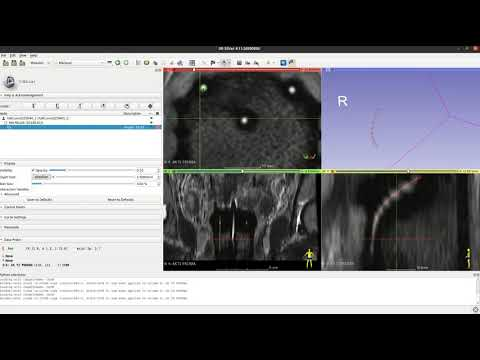

In [11]:
YouTubeVideo('FL8_dLCzlzA', width=800, height=300)

## Posicionamiento de la parte intracavitaria

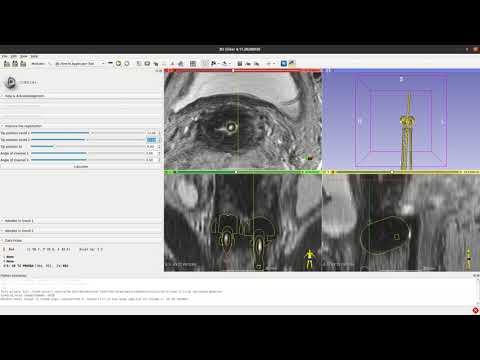

In [14]:
YouTubeVideo('Kd5etPcEsRM', width=800, height=300)

## Reconstrucción de agujas

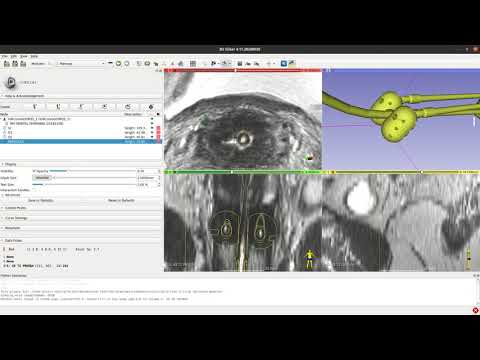

In [15]:
YouTubeVideo('6aw-_IdMBuI', width=800, height=300)